We are doing EDL vs MAST analysis in this notebook, 6 samples each
<div>
    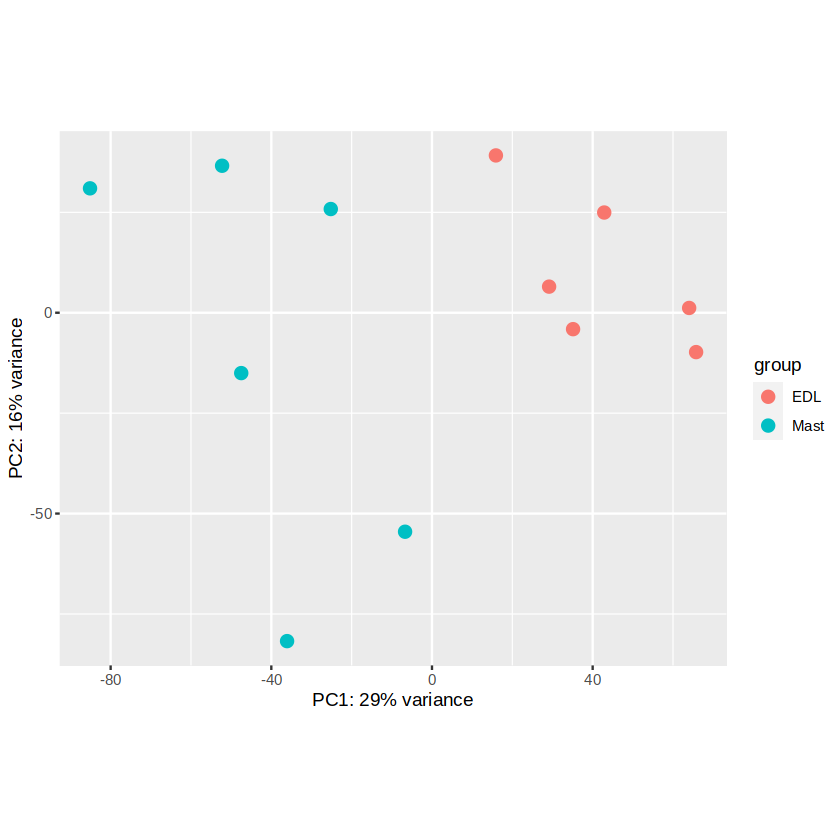
</div>

### Loading Dataset

In [3]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(source("tree_term_climb.R"))
suppressPackageStartupMessages(library(beaveR))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))

saveDir <- "environment/real_datasets/GSE100505_EDL_MAST/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/DE"
load(file.path(saveDir, "tseConsUp.RData"))
treeCons <- rowTree(tseConsUp)
l <- length(treeCons$tip)

#### Transcript level analysis

In [5]:
metaData <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/SRR_Acc_List.txt")
quantDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"
samples <- metaData$RUN
files <- file.path(quantDir, samples, "quant.sf")
colData <- cbind(data.frame(files = files, names = samples), condition = as.factor(metaData$TissueName))
seMuscle <- tximeta::tximeta(colData)


importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


found matching transcriptome:
[ GENCODE - Mus musculus - release M25 ]

loading existing TxDb created: 2023-02-17 18:26:37

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

loading existing transcript ranges created: 2023-02-17 18:26:39

fetching genome info for GENCODE



In [7]:
y <- fishpond::scaleInfReps(seMuscle)
y <- labelKeep(y)
set.seed(1)
y <- swish(y, x="condition")

In [ ]:
yAll <- computeSizeFactors(tseConsUp)
yAll <- scaleInfReps(yAll)
yAll <- labelKeep(yAll)
set.seed(1)
yAll <- swish(yAll, x="condition")

Setting inf rep depth to mean depth



Progress:   1 on 100Progress:   2 on 100Progress:   3 on 100Progress:   4 on 100Progress:   5 on 100Progress:   6 on 100Progress:   7 on 100Progress:   8 on 100Progress:   9 on 100Progress:  10 on 100Progress:  11 on 100Progress:  12 on 100Progress:  13 on 100Progress:  14 on 100Progress:  15 on 100Progress:  16 on 100Progress:  17 on 100Progress:  18 on 100Progress:  19 on 100Progress:  20 on 100Progress:  21 on 100Progress:  22 on 100Progress:  23 on 100Progress:  24 on 100Progress:  25 on 100Progress:  26 on 100Progress:  27 on 100Progress:  28 on 100Progress:  29 on 100Progress:  30 on 100Progress:  31 on 100Progress:  32 on 100Progress:  33 on 100Progress:  34 on 100Progress:  35 on 100Progress:  36 on 100Progress:  37 on 100Progress:  38 on 100Progress:  39 on 100Progress:  40 on 100Progress:  41 on 100Progress:  42 on 100Progress:  43 on 100Progress:  44 on 100Progress:  45 on 100Progress:  46 on 100Progress:  47 on 100Progress:  48 on 100Progress:  49 on 100Progress:  50 on 100

In [ ]:
sum(mcols(y)[["length"]][treeCons$tip.label,] != mcols(yAll)[["length"]])

##### Differentially Expressed Transcripts

In [12]:
sapply(c(0.01,0.05,0.1), function(x) sum(mcols(y)[["qvalue"]] <= x, na.rm=T))
dTxps <- lapply(c(0.01,0.05,0.1), function(x) rownames(y)[which(mcols(y)[["qvalue"]] <= x)])
save(dTxps, file=file.path(saveDir, "dTxps.RData"))

[1] 3384 6784 9641

##### Genes Mapping to those transcripts

In [13]:
mapDf <- rowData(seMuscle)
txpGenes <- lapply(dTxps, function(txps) unique(unlist(mapDf[txps, "gene_id"])))##Genes that map to transcripts
sapply(txpGenes, length)

[1] 2876 5353 7149

#### Gene Level

In [ ]:
gse <- summarizeToGene(seMuscle)
yg <- fishpond::scaleInfReps(gse)
yg <- labelKeep(yg)
set.seed(1)
yg <- swish(yg, x="condition")

##### Differentially expressed genes

In [8]:
dges <- lapply(c(0.01,0.05,0.1), function(x) rownames(yg)[which(mcols(yg)[["qvalue"]] <= x)])
sapply(dges, length)
# save(dges, file=file.path(saveDir, "dges.RData"))

[1] 1004 4676 6209

In [19]:
load(file=file.path(saveDir, "dges.RData"))

##### Genes that are considered differentially expressed in genes but dont contain a single differentially expressed transcript

In [20]:
diffGenes <- lapply(seq_along(dges), function(i) setdiff(dges[[i]], txpGenes[[i]])) ## Txps that are missing in differential transcripts mapping to genes
sapply(diffGenes, length)
diffGenes2 <- lapply(seq_along(dges), function(i) setdiff(txpGenes[[i]], dges[[i]])) ## Txps that are missing in differential transcripts mapping to genes                    
sapply(diffGenes2, length)
# sum(mcols(y)[unlist(mcols(yg)[diffGenes[[2]],"tx_ids"]), "qvalue"] < 0.05, na.rm=T)==0 ## None of the diffGenes should contain a differential transcript

[1]   92  940 1039

[1] 1964 1617 1979

#### TreeDE, with the total number of nodes, inner nodes and their height distribution

In [8]:
load(file.path(saveDir, "tAfterBHMoreClimbMIRV.RData"))
treeDE <- tAfterBHMoreClimbMIRV[["mIRV=0.4"]] ## renaming the treeDE variable
sapply(treeDE, length) ## number of differentially expressed nodes
sapply(treeDE, function(nodes) sum(nodes > l)) ## number of inner nodes
lapply(treeDE, function(nodes) table(node.depth(treeCons,2)[nodes])) ## Distribution of node heights

[1] 1081 6671 9458

[1]  442 2299 3049

[[1]]

  1   2   3   4   5   6   7   8   9  10  11 
639 234 112  47  24  12   5   2   3   1   2 

[[2]]

   1    2    3    4    5    6    7    8    9   10   11   13 
4372 1293  553  256  105   49   22   10    4    1    3    3 

[[3]]

   1    2    3    4    5    6    7    8    9   10   11   12   13 
6409 1748  713  325  134   63   34   17    5    4    3    1    2 


##### Genes mapping to the treeDE nodes and their number

In [14]:
genesTreeDE <- lapply(treeDE, function(nodes) {
    lapply(Descendants(treeCons,nodes), function(desc) unique(unlist(mapDf[treeCons$tip[desc],"gene_id"])))})
sapply(genesTreeDE, length) ## Number of genes mapping to treeDE nodes
sapply(genesTreeDE, function(nodes) table(sapply(nodes,length))) ## Distribution of number of genes and nodes

[1] 1081 6671 9458

[[1]]

   1    2    5 
1071    9    1 

[[2]]

   1    2    3    4 
6602   57    8    4 

[[3]]

   1    2    3    4    7    9 
9367   74   10    4    1    2 


#### Genes that map only to treeDE but are neither DE or covered by differential transcripts

In [17]:
innerNodesUniqueGenes <- lapply(seq_along(genesTreeDE), function(i) setdiff(unlist(genesTreeDE[[i]]), union(dges[[i]], txpGenes[[i]])))
head(innerNodesUniqueGenes[[2]]) 
sapply(innerNodesUniqueGenes, length)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'y' in selecting a method for function 'setdiff': error in evaluating the argument 'x' in selecting a method for function 'union': object 'dges' not found


Such inner nodes can be possible DTUs. We thus extract the treeDE nodes to which these genes map to and try to see if there are multiple such tree DE nodes that map to same gene.Looking at the 0.05 threshold change, we find only 1 gene for which a dtu on the inner nodes is observed.

For the remaining that have map to inner node, infRV decreases compared to their childrer though the logFC is lower compared to children. logFC though definitely decreases at gene.

In [16]:
qval <- 0.05
i <- 2
gN <- innerNodesUniqueGenes[[i]][which(mcols(yg)[innerNodesUniqueGenes[[i]],"qvalue"] > qval)]
length(gN)

# extracting genes unique to treeDE and have logFC > 0.5 or have atleast two sig nodes
twoNodes <- list()
lfcNodes <- c()
j <- 1
for(g in gN) {
    iid <- which(sapply(genesTreeDE[[i]], function(genes) sum(g %in%  genes) > 0))
    if(length(iid) > 1) {
        twoNodes[[j]] <- iid
        j <- j + 1
    }
    else if(length(which(abs(mcols(yAll)[treeDE[[2]][iid],"log2FC"]) > 0.5)) > 0) {
        lfcNodes <- c(lfcNodes, iid)
    }
}
length(twoNodes)
length(lfcNodes)

ERROR: Error in eval(expr, envir, enclos): object 'innerNodesUniqueGenes' not found


In [7]:
geneTreeDE

ERROR: Error in eval(expr, envir, enclos): object 'geneTreeDE' not found


##### DTU

In [15]:
##Follow up analysis
## (1,2) map to more than 1 gene
## 4,5,6 shows no dtu
j <- 3
gs <- genesTreeDE[[2]][[twoNodes[[j]][1]]]
genesTreeDE[[2]][[twoNodes[[j]][2]]]

print("Gene Level")
mcols(yg)[gs,c("log10mean", "log2FC", "qvalue")]

print("TreeDE Node 1")
mcols(yAll)[treeDE[[2]][twoNodes[[j]][1]],]
print("Transcripts mapping TreeDE Node 1")
mcols(yAll)[unlist(Descendants(treeCons,treeDE[[2]][twoNodes[[j]][1]])),]
print("TreeDE Node 2")
mcols(yAll)[tAfterBHMoreClimbMIRV[[1]][[2]][twoNodes[[j]][2]],c("meanInfRV", "log10mean", "log2FC", "qvalue")]
print("Transcripts mapping TreeDE Node 2")
mcols(yAll)[unlist(Descendants(treeCons,treeDE[[2]][twoNodes[[j]][2]])),c("meanInfRV", "log10mean", "log2FC", "qvalue")]

ERROR: Error in eval(expr, envir, enclos): object 'twoNodes' not found


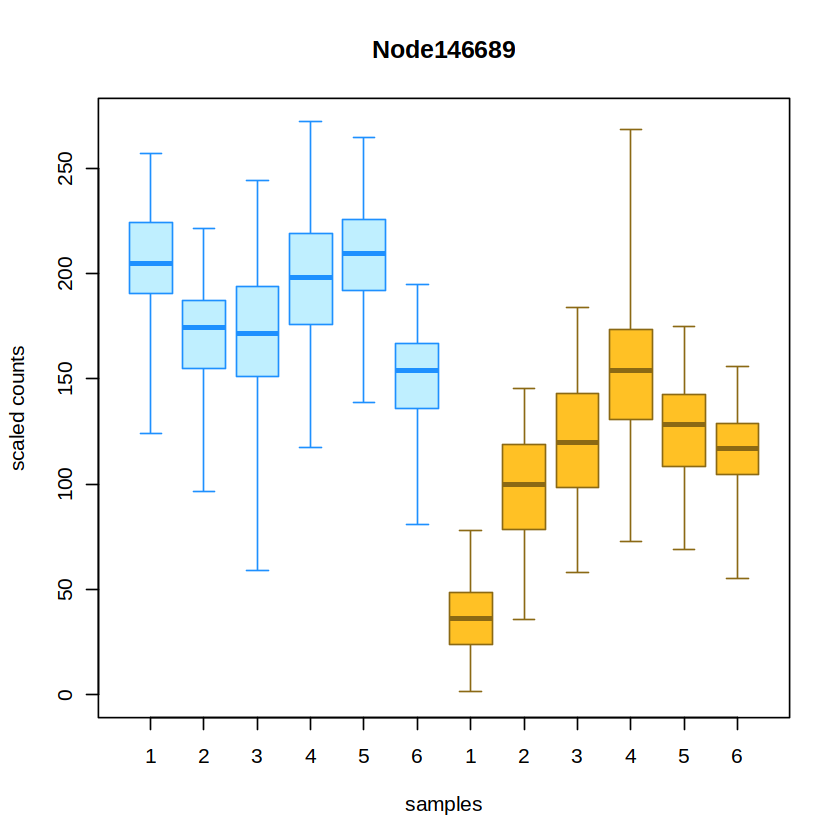

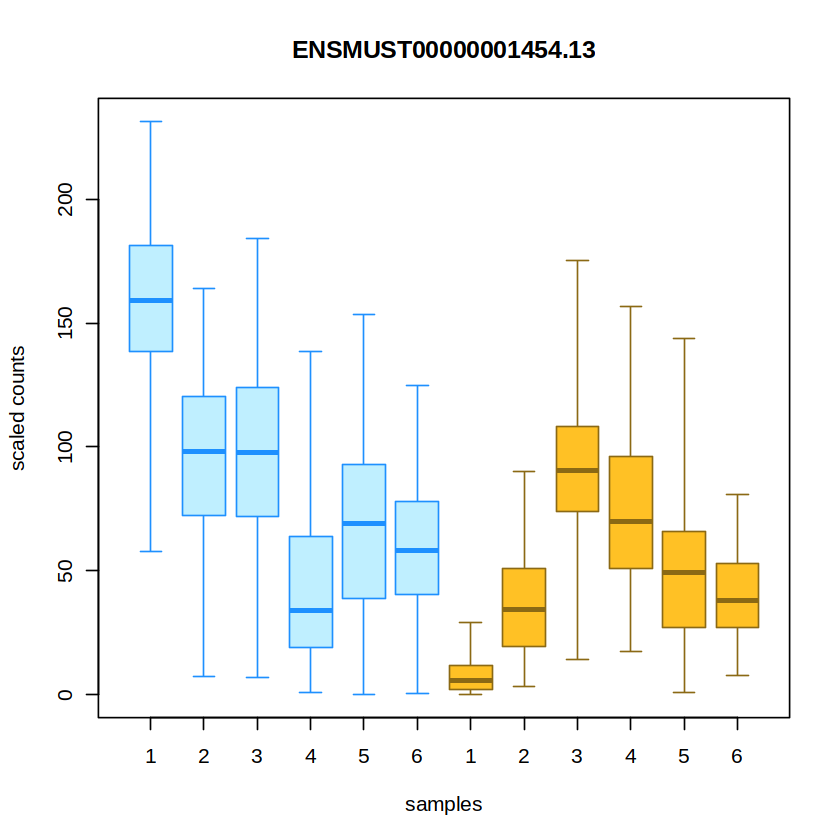

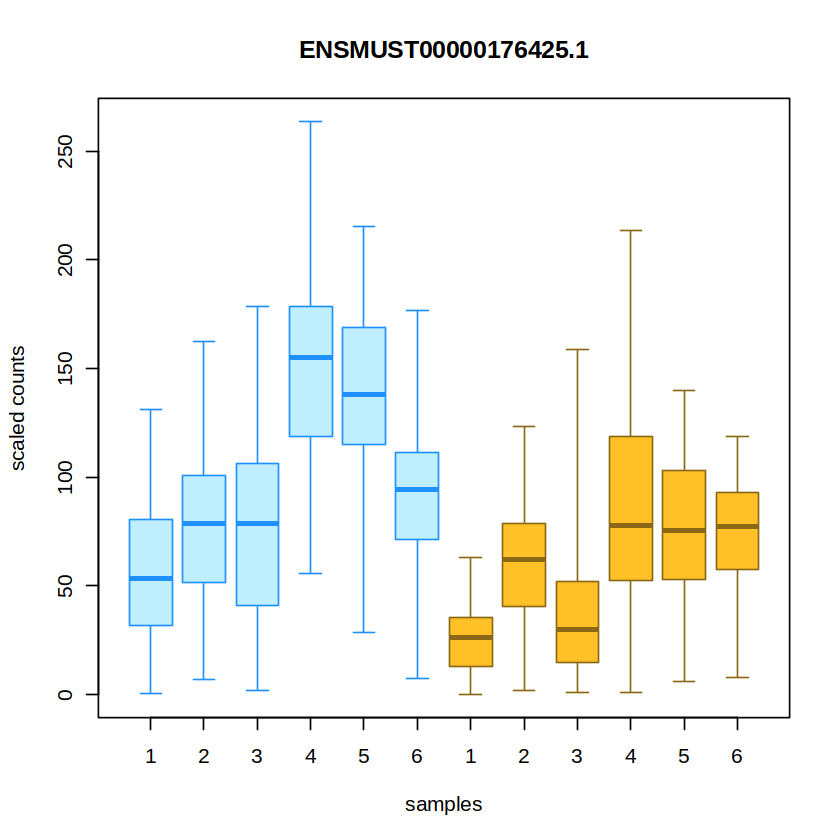

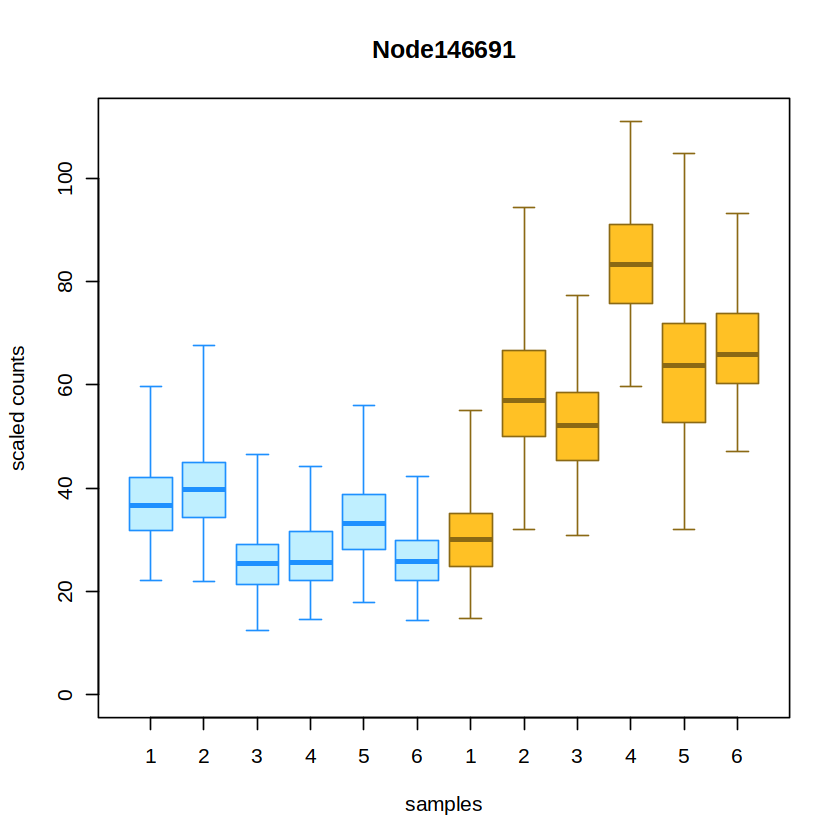

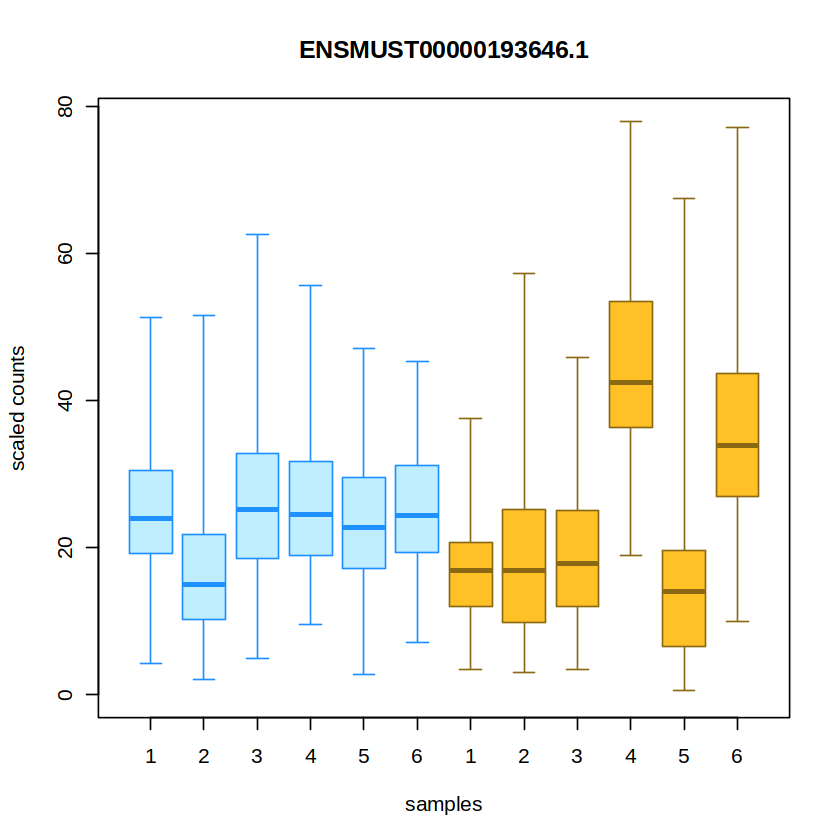

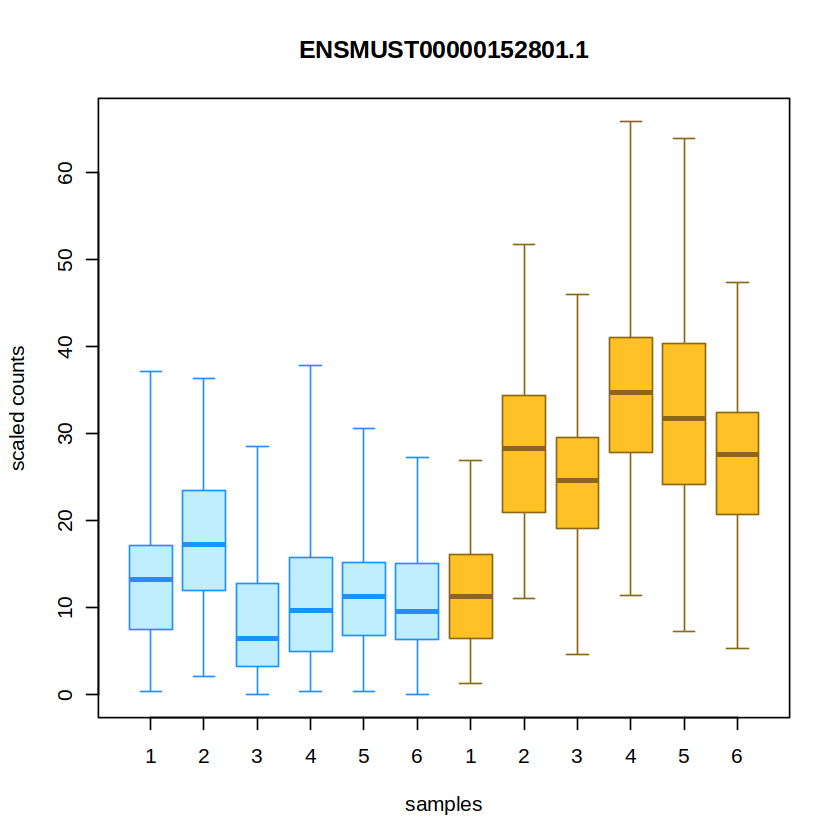

In [30]:
plotInfReps(y=yAll, x = "condition", idx = treeDE[[2]][twoNodes[[j]][1]])
plotInfReps(y=yAll, x = "condition", idx = unlist(Descendants(treeCons,treeDE[[2]][twoNodes[[j]][1]]))[1])
plotInfReps(y=yAll, x = "condition", idx = unlist(Descendants(treeCons,treeDE[[2]][twoNodes[[j]][1]]))[2])

plotInfReps(y=yAll, x = "condition", idx = treeDE[[2]][twoNodes[[j]][2]])
plotInfReps(y=yAll, x = "condition", idx = unlist(Descendants(treeCons,treeDE[[2]][twoNodes[[j]][2]]))[1])
plotInfReps(y=yAll, x = "condition", idx = unlist(Descendants(treeCons,treeDE[[2]][twoNodes[[j]][2]]))[2])

##### Other example of the above genes that however show no dtu

In [26]:
## A lowering of the LFC but also along with a substantial decrease in infRV
## Some of these nodes map to multiple genes some of which are DEs
head(order(mcols(yAll)[treeDE[[2]][lfcNodes],"log10mean"], decreasing=T), 30)
j <- 114
gs <- genesTreeDE[[2]][[lfcNodes[j]]]
print(gs)
mcols(yg)[gs,c("log10mean", "log2FC", "qvalue")]
mcols(yAll)[treeDE[[2]][lfcNodes[j]],c("meanInfRV", "log10mean", "log2FC", "qvalue")]
mcols(yAll)[unlist(Descendants(treeCons,treeDE[[2]][lfcNodes[j]])),c("meanInfRV", "log10mean", "log2FC", "qvalue")]

j <- 153
gs <- genesTreeDE[[2]][[lfcNodes[j]]]
mcols(yg)[gs,c("log10mean", "log2FC", "qvalue")]
mcols(yAll)[treeDE[[2]][lfcNodes[j]],c("meanInfRV", "log10mean", "log2FC", "qvalue")]
mcols(yAll)[unlist(Descendants(treeCons,treeDE[[2]][lfcNodes[j]])),c("meanInfRV", "log10mean", "log2FC", "qvalue")]

j <- 50
gs <- genesTreeDE[[2]][[lfcNodes[j]]]
mcols(yg)[gs,c("log10mean", "log2FC", "qvalue")]
mcols(yAll)[treeDE[[2]][lfcNodes[j]],c("meanInfRV", "log10mean", "log2FC", "qvalue")]
mcols(yAll)[unlist(Descendants(treeCons,treeDE[[2]][lfcNodes[j]])),c("meanInfRV", "log10mean", "log2FC", "qvalue")]

j <- 70
gs <- genesTreeDE[[2]][[lfcNodes[j]]]
mcols(yg)[gs,c("log10mean", "log2FC", "qvalue")]
mcols(yAll)[treeDE[[2]][lfcNodes[j]],c("meanInfRV", "log10mean", "log2FC", "qvalue")]
mcols(yAll)[unlist(Descendants(treeCons,treeDE[[2]][lfcNodes[j]])),c("meanInfRV", "log10mean", "log2FC", "qvalue")]

[1] 114 138 139  66 181  49   4 153  62  21  50  70  54 131 212  13 186  95  47
[20] 203  65 143  69 109 198 101  31  67  19  88

[1] "ENSMUSG00000038717.8"


DataFrame with 1 row and 3 columns
                     log10mean    log2FC    qvalue
                     <numeric> <numeric> <numeric>
ENSMUSG00000038717.8   3.88265  0.200366  0.593126

DataFrame with 1 row and 4 columns
           meanInfRV log10mean    log2FC    qvalue
           <numeric> <numeric> <numeric> <numeric>
Node135025  0.878695   3.76689 -0.521893 0.0492608

DataFrame with 2 rows and 4 columns
                     meanInfRV log10mean    log2FC    qvalue
                     <numeric> <numeric> <numeric> <numeric>
ENSMUST00000213999.1   1.82022   3.59095 -0.569079  0.187147
ENSMUST00000043675.8   4.11910   3.30621 -0.451022  0.381328

DataFrame with 1 row and 3 columns
                      log10mean     log2FC    qvalue
                      <numeric>  <numeric> <numeric>
ENSMUSG00000042524.14   3.55933 -0.0202132  0.937868

DataFrame with 1 row and 4 columns
           meanInfRV log10mean    log2FC    qvalue
           <numeric> <numeric> <numeric> <numeric>
Node149713   24.8297   3.33331 -0.576051  0.038743

DataFrame with 2 rows and 4 columns
                      meanInfRV log10mean    log2FC    qvalue
                      <numeric> <numeric> <numeric> <numeric>
ENSMUST00000100439.9    87.8116   3.07301 -0.135075 0.7556744
ENSMUST00000046259.13  151.6170   2.99900 -1.251603 0.0999765

DataFrame with 1 row and 3 columns
                      log10mean    log2FC    qvalue
                      <numeric> <numeric> <numeric>
ENSMUSG00000030091.17   3.16422  0.502679 0.0892353

DataFrame with 1 row and 4 columns
           meanInfRV log10mean    log2FC    qvalue
           <numeric> <numeric> <numeric> <numeric>
Node116478  0.149123   3.11019   0.50212 0.0446436

DataFrame with 3 rows and 4 columns
                      meanInfRV log10mean    log2FC    qvalue
                      <numeric> <numeric> <numeric> <numeric>
ENSMUST00000113509.1    78.5376   2.47975  0.969959  0.383692
ENSMUST00000032179.13   27.2685   2.97251  0.335814  0.631692
ENSMUST00000142951.8    12.3597   1.63149  0.176721  0.998280

DataFrame with 1 row and 3 columns
                      log10mean    log2FC    qvalue
                      <numeric> <numeric> <numeric>
ENSMUSG00000020111.15   3.10211 0.0961088  0.703928

DataFrame with 1 row and 4 columns
           meanInfRV log10mean    log2FC    qvalue
           <numeric> <numeric> <numeric> <numeric>
Node122098  0.459384    3.0222 -0.513559 0.0268062

DataFrame with 3 rows and 4 columns
                      meanInfRV log10mean    log2FC    qvalue
                      <numeric> <numeric> <numeric> <numeric>
ENSMUST00000092508.11   7.21170   2.64193 -0.366594  0.201841
ENSMUST00000165563.7    5.13769   2.77628 -0.638599  0.107409
ENSMUST00000020311.12  13.13401   1.28486        NA        NA

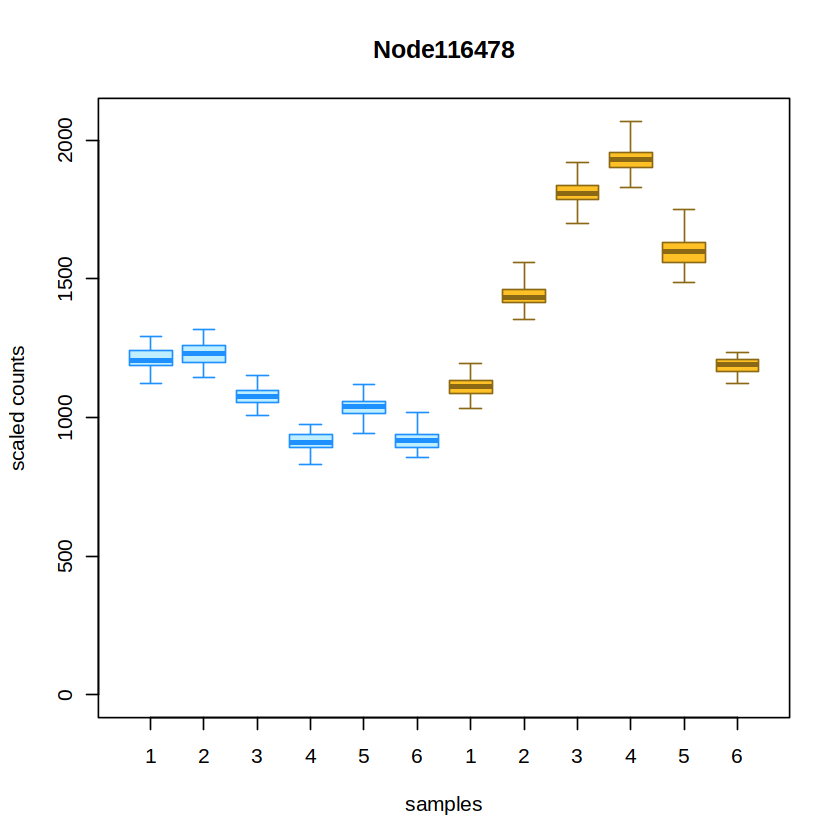

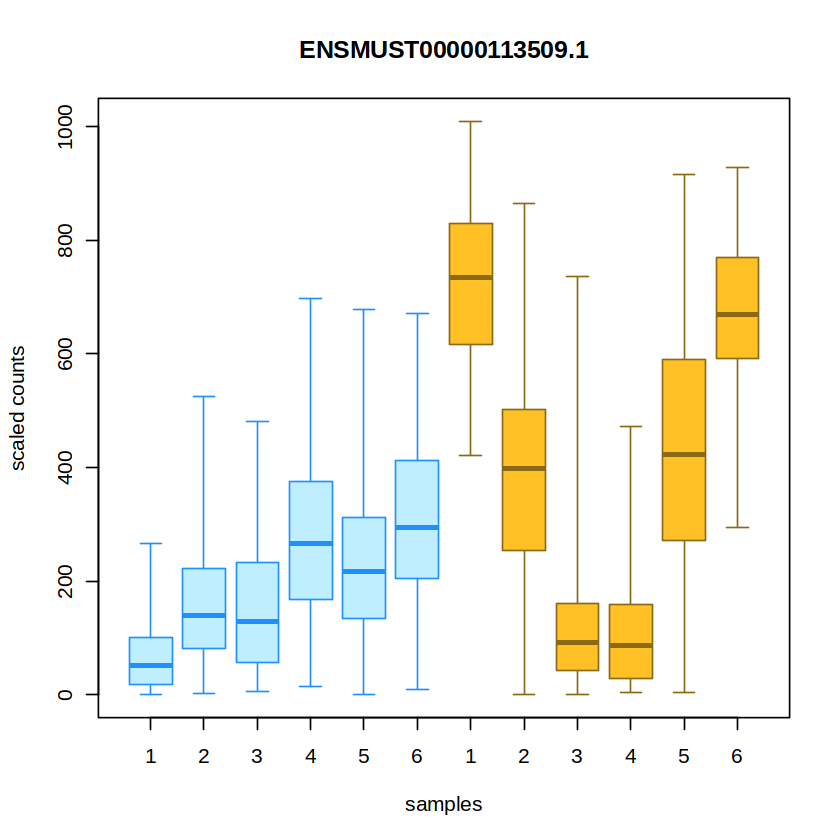

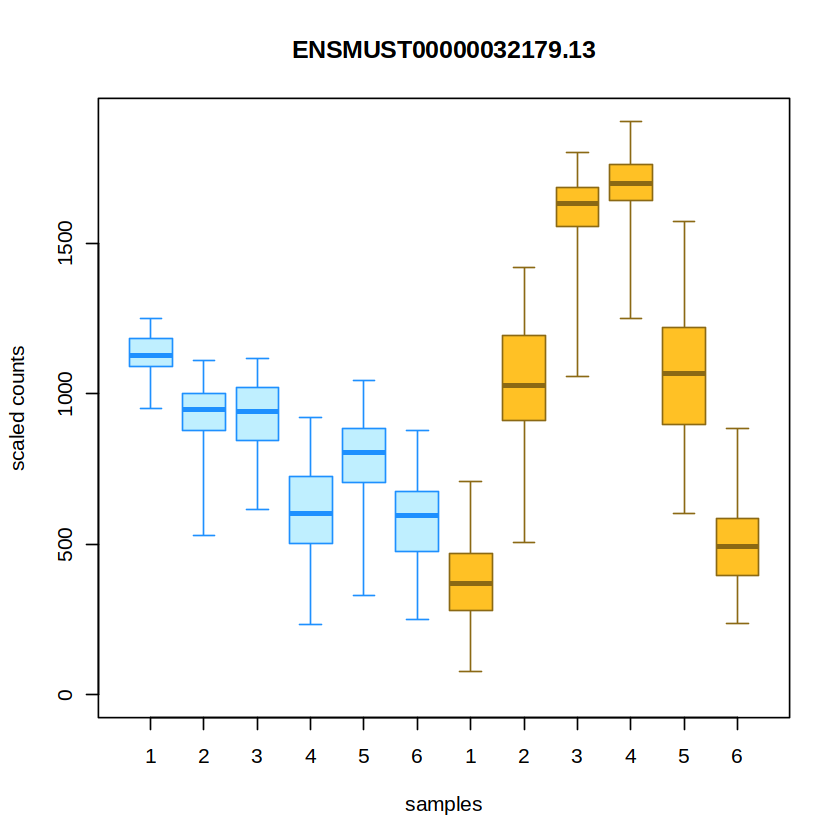

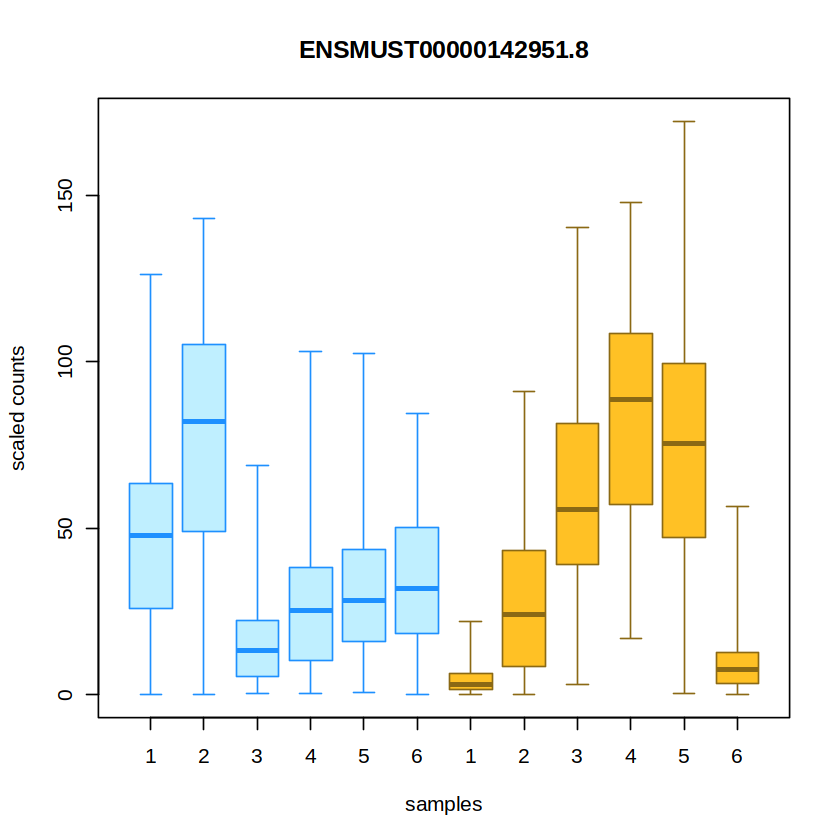

In [25]:
plotInfReps(y=yAll, x = "condition", idx = treeDE[[2]][lfcNodes[j]])
plotInfReps(y=yAll, x = "condition", idx = unlist(Descendants(treeCons,treeDE[[2]][lfcNodes[j]]))[1])
plotInfReps(y=yAll, x = "condition", idx = unlist(Descendants(treeCons,treeDE[[2]][lfcNodes[j]]))[2])
plotInfReps(y=yAll, x = "condition", idx = unlist(Descendants(treeCons,treeDE[[2]][lfcNodes[j]]))[3])

#### Genes belonging to treeDE nodes that intersect with differentially expressed genes but are not covered by transcripts.'
We see many such genes that contain differential nodes but no differentially expressed transcripts. The magnitude of logFC in most cases though decreases from trancript to gene.

In [12]:
genesNodeCommonDGE <- lapply(seq_along(diffGenes), function(i) unlist(genesTreeDE[[i]])[unlist(genesTreeDE[[i]]) %in% diffGenes[[i]]]) ## Number of genes mapping to inner nodes that also map to dges but not dtes
treeDECommonInds <- lapply(seq_along(genesNodeCommonDGE), function(i) {
    sapply(genesNodeCommonDGE[[i]], function(genes) {
        sapply(genes, function(gene) {
            which(sapply(genesTreeDE[[i]], function(gs) sum(gene %in% gs) > 0))
        })
    })
})
sapply(genesNodeCommonDGE, length)

[1]  42 449 497

In [23]:
order(mcols(yg)[genesNodeCommonDGE[[2]], "qvalue"])[11:20]

[1] 319 336 353 362 388 395 396 403 415 428

In [34]:
i <- 2
for(j in c(16,76,78,130,283,336,362,403)) {
    g <- genesNodeCommonDGE[[i]][j]
    
    txps <- unlist(mcols(yg)[g,2])
    print(length(txps))
    print(mcols(yg)[g,c("log10mean", "log2FC", "qvalue")])
    print(mcols(yAll)[txps[which.min(abs(mcols(y)[txps, 'qvalue']))],c("log10mean", "log2FC", "qvalue")])
    print(mcols(yAll)[treeDE[[i]][treeDECommonInds[[i]][[j]]],c("meanInfRV", "log10mean", "log2FC", "qvalue")])
    print(mcols(yAll)[Descendants(treeCons,treeDE[[i]][treeDECommonInds[[i]][[j]]])[[1]],c("meanInfRV", "log10mean", "log2FC", "qvalue")])
}


[1] 13
DataFrame with 1 row and 3 columns
                      log10mean    log2FC      qvalue
                      <numeric> <numeric>   <numeric>
ENSMUSG00000026883.17   3.15741 -0.797206 1.08696e-05
DataFrame with 1 row and 3 columns
                     log10mean    log2FC    qvalue
                     <numeric> <numeric> <numeric>
ENSMUST00000112983.7   2.80029 -0.801816  0.081999
DataFrame with 1 row and 4 columns
           meanInfRV log10mean    log2FC     qvalue
           <numeric> <numeric> <numeric>  <numeric>
Node101187 0.0816088   3.13053 -0.773816 2.2242e-06
DataFrame with 11 rows and 4 columns
                      meanInfRV log10mean     log2FC    qvalue
                      <numeric> <numeric>  <numeric> <numeric>
ENSMUST00000112987.7    55.0182   1.83794         NA        NA
ENSMUST00000112983.7    34.4075   2.80029 -0.8018163 0.0819990
ENSMUST00000112992.8    69.7920   2.16188 -0.2041573 0.8362701
ENSMUST00000091010.11   63.3198   2.25590 -1.9196310 0.0692008
EN

https://useast.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000026883;r=2:35448278-35621006
https://useast.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000057315;mr=5:102861682-103051275;r=5:102629257-103045803;t=ENSMUST00000073302
https://useast.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000070509;r=7:73025257-73069647
https://useast.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000019699;r=1:176847639-177085769
https://useast.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000038481;r=10:40215560-40359814
https://useast.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000022553;r=15:76235494-76238580
https://useast.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000021143;r=12:112978128-113038021
https://useast.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000038807;r=11:74274182-74501741

In [5]:
sum(mcols(y)[treeCons$tip,"qvalue"] < 0.01, na.rm=T)
sum(mcols(y)[treeCons$tip,"qvalue"] < 0.05, na.rm=T)
sum(mcols(y)[treeCons$tip,"qvalue"] < 0.1, na.rm=T)

sum(mcols(yAll)[treeCons$tip,"qvalue"] < 0.01, na.rm=T)
sum(mcols(yAll)[treeCons$tip,"qvalue"] < 0.05, na.rm=T)
sum(mcols(yAll)[treeCons$tip,"qvalue"] < 0.1, na.rm=T)

[1] 3384

[1] 6784

[1] 9641

[1] 869

[1] 5631

[1] 8348

In [6]:
sum(mcols(y)[["keep"]])
sum(mcols(yAll)[["keep"]])

[1] 39481

[1] 106868